In [ ]:
!pip install patool
import patoolib
patoolib.extract_archive("/content/drive/MyDrive/Photos.rar", outdir="/content")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 KB 4.6 MB/s eta 0:00:00
patool: Extracting /content/drive/MyDrive/Photos.rar ...
patool: running /usr/bin/unrar x -- /content/drive/MyDrive/Photos.rar
patool:     with cwd='/content'
patool: ... /content/drive/MyDrive/Photos.rar extracted to `/content'.


'/content'

In [ ]:
import cv2
import matplotlib.pyplot as plt
import os
import shutil
'''
directory = r"/content/drive/MyDrive/Photos.rar"
male,female = [],[]
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    if filename == 'Male':
        for i in os.listdir(f):
            temp = os.path.join(f, i)
            img = cv2.imread(temp,0)
            male.append(cv2.resize(img,(256,256)))
    if filename == 'Female':
        for i in os.listdir(f):
            temp = os.path.join(f, i)
            img = cv2.imread(temp,0)           
            female.append(cv2.resize(img,(256,256)))
'''

'\ndirectory = r"/content/drive/MyDrive/Photos.rar"\nmale,female = [],[]\nfor filename in os.listdir(directory):\n    f = os.path.join(directory, filename)\n    if filename == \'Male\':\n        for i in os.listdir(f):\n            temp = os.path.join(f, i)\n            img = cv2.imread(temp,0)\n            male.append(cv2.resize(img,(256,256)))\n    if filename == \'Female\':\n        for i in os.listdir(f):\n            temp = os.path.join(f, i)\n            img = cv2.imread(temp,0)           \n            female.append(cv2.resize(img,(256,256)))\n'

In [ ]:
len('/content/Photos/Female')

22

In [ ]:
len('/content/Photos/Male')

20

In [ ]:
os.mkdir('train')
os.mkdir('valid')

In [ ]:
os.mkdir('train/male')
os.mkdir('valid/female')
os.mkdir('train/female')
os.mkdir('valid/male')

FileNotFoundError: ignored

In [ ]:
dir_1 = '/content/Photos/Male'
dir_2 = '/content/train/male'

dir1_lst = os.listdir(dir_1)
dir1_lst.sort()

for img in dir1_lst[:15]:
  shutil.move(os.path.join(dir_1, img), os.path.join(dir_2, img))

dir_3 = '/content/valid/male'

for img in dir1_lst[15:]:
  shutil.move(os.path.join(dir_1, img), os.path.join(dir_3, img))

In [ ]:
dir_1 = '/content/Photos/Female'
dir_2 = '/content/train/female'

dir1_lst = os.listdir(dir_1)
dir1_lst.sort()

for img in dir1_lst[:15]:
  shutil.move(os.path.join(dir_1, img), os.path.join(dir_2, img))

dir_3 = '/content/valid/female'

for img in dir1_lst[15:]:
  shutil.move(os.path.join(dir_1, img), os.path.join(dir_3, img))

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data_gen = ImageDataGenerator(rescale=1/255)
validation_data_gen = ImageDataGenerator(rescale=1/255)
train_gen = train_data_gen.flow_from_directory(
    '/content/train',
    target_size = (128,128),
    class_mode = 'binary'
)

val_gen = train_data_gen.flow_from_directory(
    '/content/valid',
    target_size = (128,128),
    class_mode = 'binary'
)

Found 30 images belonging to 2 classes.
Found 15 images belonging to 2 classes.


In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(128, 128,3)),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(1,activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
model_fit = model.fit(train_gen,
                     epochs = 5,
                    verbose = 1,
                     validation_data = val_gen)

Epoch 1/5
1/1 [==============================] - 1s 694ms/step - loss: 0.7511 - accuracy: 0.5333 - val_loss: 100.7761 - val_accuracy: 0.5333
Epoch 2/5
1/1 [==============================] - 0s 106ms/step - loss: 104.2713 - accuracy: 0.5000 - val_loss: 28.5642 - val_accuracy: 0.5333
Epoch 3/5
1/1 [==============================] - 0s 109ms/step - loss: 27.7477 - accuracy: 0.5000 - val_loss: 43.6316 - val_accuracy: 0.4667
Epoch 4/5
1/1 [==============================] - 0s 112ms/step - loss: 47.4485 - accuracy: 0.5000 - val_loss: 46.3563 - val_accuracy: 0.4667
Epoch 5/5
1/1 [==============================] - 0s 116ms/step - loss: 49.4684 - accuracy: 0.5000 - val_loss: 35.5947 - val_accuracy: 0.4667


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 49152)             0         
                                                                 
 dense_2 (Dense)             (None, 512)               25166336  
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 513       
                                                                 
Total params: 25,166,849
Trainable params: 25,166,849
Non-trainable params: 0
_________________________________________________________________


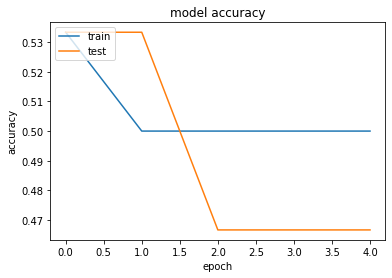

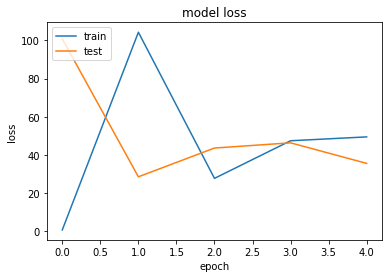

In [ ]:
import matplotlib.pyplot as plt
plt.plot(model_fit.history['accuracy'])
plt.plot(model_fit.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(model_fit.history['loss'])
plt.plot(model_fit.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
pred=model.predict(train_gen)

1/1 [==============================] - 0s 66ms/step


In [ ]:
print(pred[0])

[3.014767e-24]


In [ ]:
print(pred[20].round(2))

[0.]


In [ ]:
print(pred[0])

[1.6345613e-31]


In [ ]:
train_gen.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)